In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

np.random.seed(42)
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.5, random_state=42)
k = 3

In [2]:
random_indexes = np.random.choice(len(X), k, replace=False)
centroids = X[random_indexes]

def assign_clusters(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, k):
    new_centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        if np.sum(labels == i) > 0:
            new_centroids[i] = X[labels == i].mean(axis=0)
    return new_centroids

In [3]:
figures = []
iteration = 0

figures.append(("Random Initialization", X, None, centroids))

while True:
    iteration += 1
    labels = assign_clusters(X, centroids)
    figures.append((f"Iteration {iteration} - Cluster Assignment", X, labels, centroids))
    new_centroids = update_centroids(X, labels, k)
    figures.append((f"Iteration {iteration} - Centroid Update", X, labels, new_centroids))
    if np.allclose(new_centroids, centroids):
        break
    centroids = new_centroids

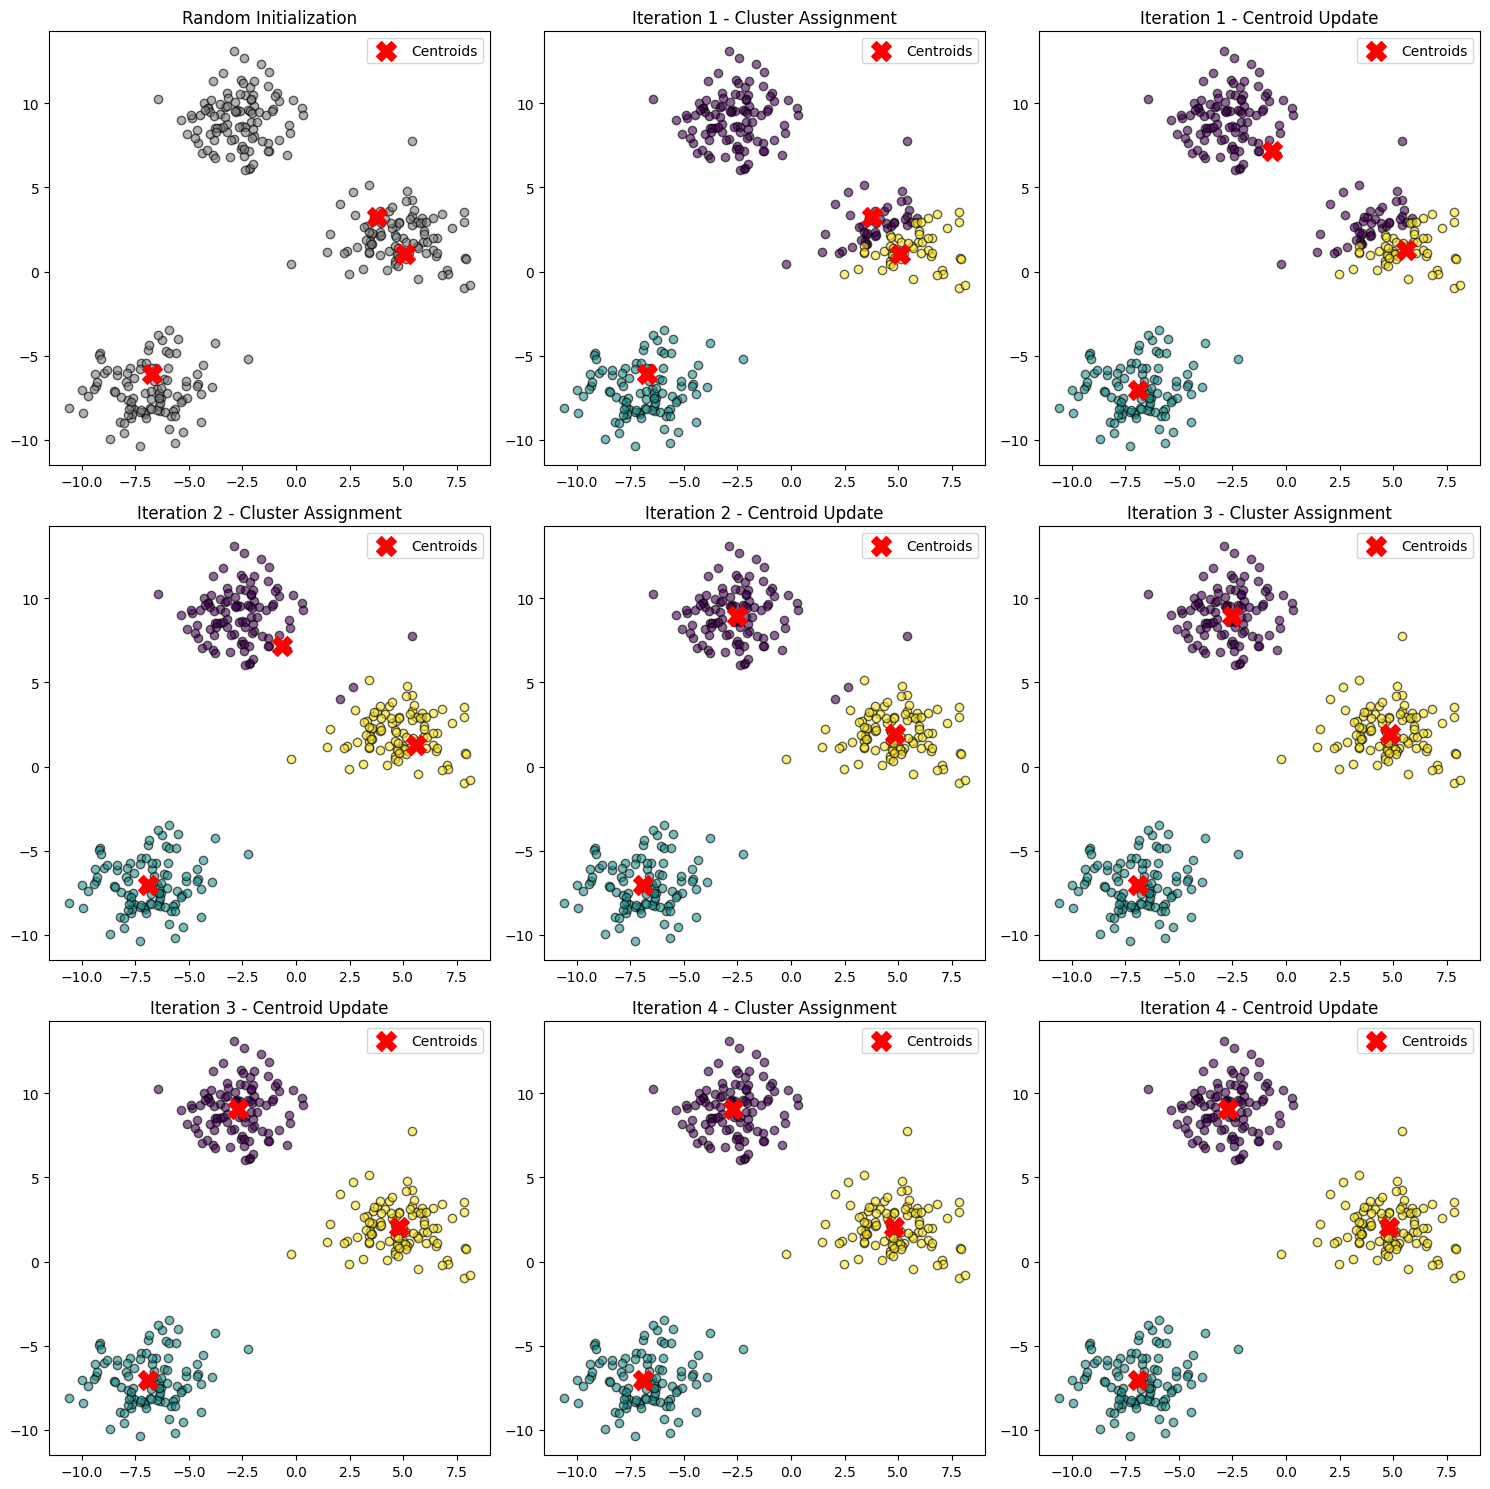

In [4]:
# Determine grid size for subplots
num_plots = len(figures)
cols = 3
rows = (num_plots // cols) + (1 if num_plots % cols else 0)

# Create figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))
axes = axes.flatten()

# Plot each step in the grid
for i, (title, x, labels, centroids_plot) in enumerate(figures):
    ax = axes[i]
    colors = plt.cm.viridis(np.linspace(0, 1, k)) if labels is not None else ['gray']
    
    if labels is None:  # initial step
        ax.scatter(x[:, 0], x[:, 1], c="gray", edgecolors='k', alpha=0.6)
    else:
        for j in range(k):
            if np.sum(labels == j) > 0:
                ax.scatter(x[labels == j, 0], x[labels == j, 1], 
                          color=colors[j], edgecolors='k', alpha=0.6)
    
    # Plot centroids
    ax.scatter(centroids_plot[:, 0], centroids_plot[:, 1], 
               c="red", marker='X', s=200, label="Centroids")
    ax.set_title(title)
    ax.legend()

# Remove empty subplots if any
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.savefig("./figures/kmeans.jpg")
plt.show()